In [2]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.6 MB/s eta 0:00:00ta 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Set the path to your folder with CSV files
folder_path = '../Output_Features_1hour'

# Load all CSV files and check for feature consistency
all_data = []
file_feature_counts = {}

for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        data = pd.read_csv(file_path)
        all_data.append(data)
        
        # Record the number of features for each file
        file_feature_counts[file] = data.shape[1]

# Check if all files have the same number of features
unique_feature_counts = set(file_feature_counts.values())
if len(unique_feature_counts) == 1:
    print("All files have the same number of features.")
else:
    print("Feature count varies across files:", file_feature_counts)

All files have the same number of features.


In [2]:
# Combine all data for EDA
combined_data = pd.concat(all_data, ignore_index=True)

# Summary statistics
summary_stats = combined_data.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
           num_ibis  hrv_mean_nni  hrv_median_nni  hrv_range_nni     hrv_sdsd  \
count  5378.000000   5376.000000     5376.000000    5376.000000  5376.000000   
mean   2870.034697    871.280907      858.790180    1175.854563   145.053599   
std     917.342255    137.975674      153.205317     231.667463    68.842140   
min       0.000000    312.497018      312.500000       6.928223     0.238898   
25%    2261.250000    776.245924      745.819305    1013.906189    87.310061   
50%    2956.000000    846.980982      837.373108    1279.442871   137.289406   
75%    3465.000000    954.481729      957.309814    1358.221130   198.240023   
max    5817.000000   1337.485872     1382.904053    1673.585205   549.635052   

         hrv_rmssd   hrv_nni_50  hrv_pnni_50   hrv_nni_20  hrv_pnni_20  ...  \
count  5376.000000  5376.000000  5376.000000  5376.000000  5376.000000  ...   
mean    145.053638  1307.304694    48.393853  2113.835122    74.606482  ...   
std      68.842163   

/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


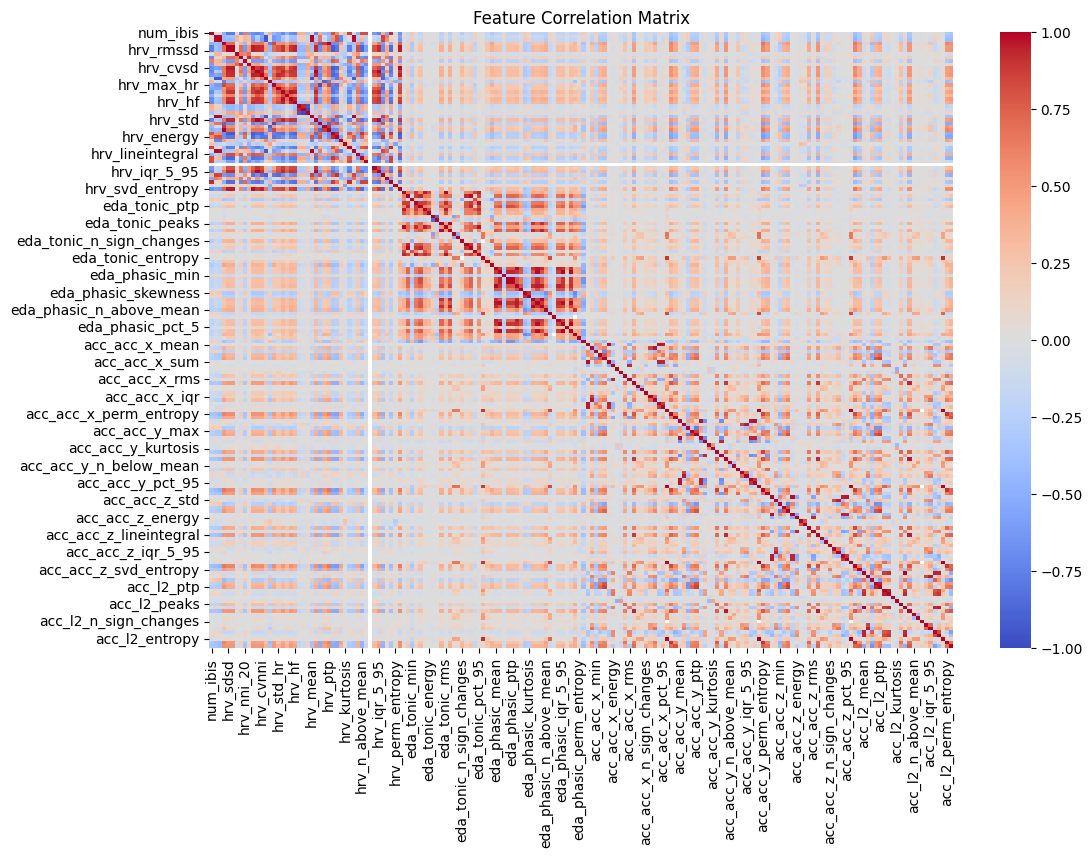

In [4]:
# Correlation matrix
combined_data = combined_data.drop(columns=combined_data.columns[0])
correlation_matrix = combined_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Matrix")
plt.show()

No NaN or infinite values remain after processing.
Original number of features: 178
Reduced number of features after PCA: 3


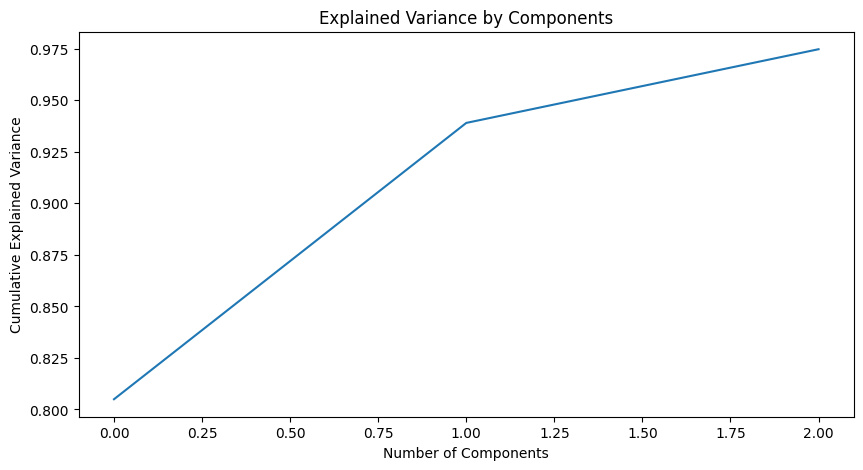

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Replace infinite values with NaN
combined_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy="mean")
imputed_data = imputer.fit_transform(combined_data)

# Verify there are no NaNs or infinite values
if np.isnan(imputed_data).any() or np.isinf(imputed_data).any():
    print("There are still NaN or infinite values present.")
else:
    print("No NaN or infinite values remain after processing.")

# PCA for Dimensionality Reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance
pca_result = pca.fit_transform(imputed_data)

print("Original number of features:", combined_data.shape[1])
print("Reduced number of features after PCA:", pca_result.shape[1])

# Plot explained variance ratio by each principal component
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Components")
plt.show()


In [6]:
# Retrieve the components (loadings)
pca_components = pd.DataFrame(pca.components_, columns=combined_data.columns)

# Display top contributing features for each component
top_n = 5  # Number of top features to display per component
for i, component in enumerate(pca_components.iterrows()):
    top_features = component[1].abs().sort_values(ascending=False).head(top_n)
    print(f"Principal Component {i+1} - Top Contributing Features:")
    print(top_features)
    print()


Principal Component 1 - Top Contributing Features:
hrv_energy          0.998318
acc_l2_energy       0.049975
acc_acc_x_energy    0.020635
acc_acc_y_energy    0.016433
acc_acc_z_energy    0.012907
Name: 0, dtype: float64

Principal Component 2 - Top Contributing Features:
acc_l2_energy       0.854464
acc_acc_x_energy    0.394720
acc_acc_z_energy    0.279558
acc_acc_y_energy    0.180186
hrv_energy          0.057520
Name: 1, dtype: float64

Principal Component 3 - Top Contributing Features:
acc_acc_x_energy    0.759606
acc_acc_z_energy    0.573970
acc_acc_y_energy    0.287896
acc_l2_energy       0.102260
acc_acc_x_sum       0.008878
Name: 2, dtype: float64



/home/jovyan/.local/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/jovyan/.local/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1200x1000 with 0 Axes>

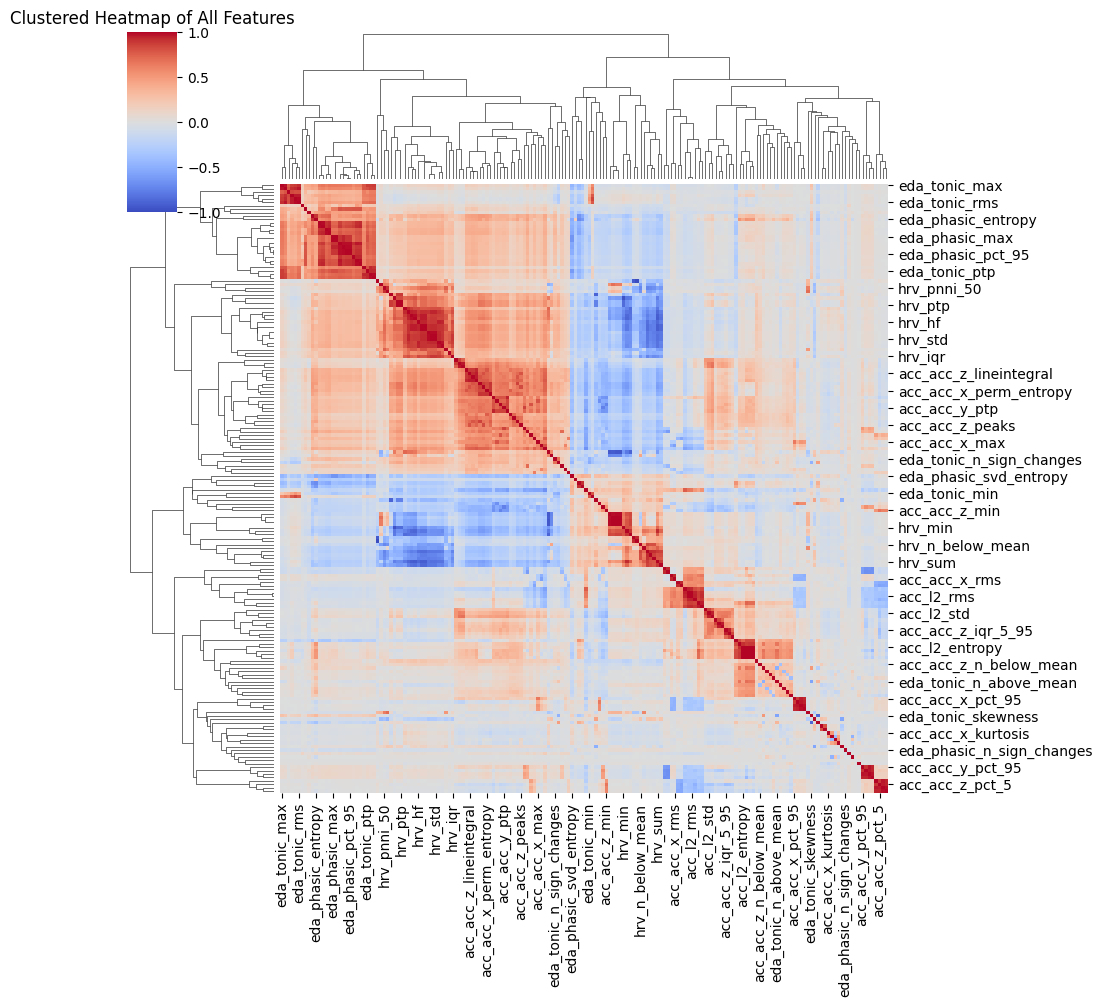

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster import hierarchy

# Replace any NaN or infinite values in the correlation matrix with 0
corr_matrix = combined_data.corr()
corr_matrix = corr_matrix.replace([np.inf, -np.inf], np.nan).fillna(0)

# Clustered heatmap for all features
plt.figure(figsize=(12, 10))
sns.clustermap(corr_matrix, cmap="coolwarm", metric="euclidean", method="average")
plt.title("Clustered Heatmap of All Features")
plt.show()

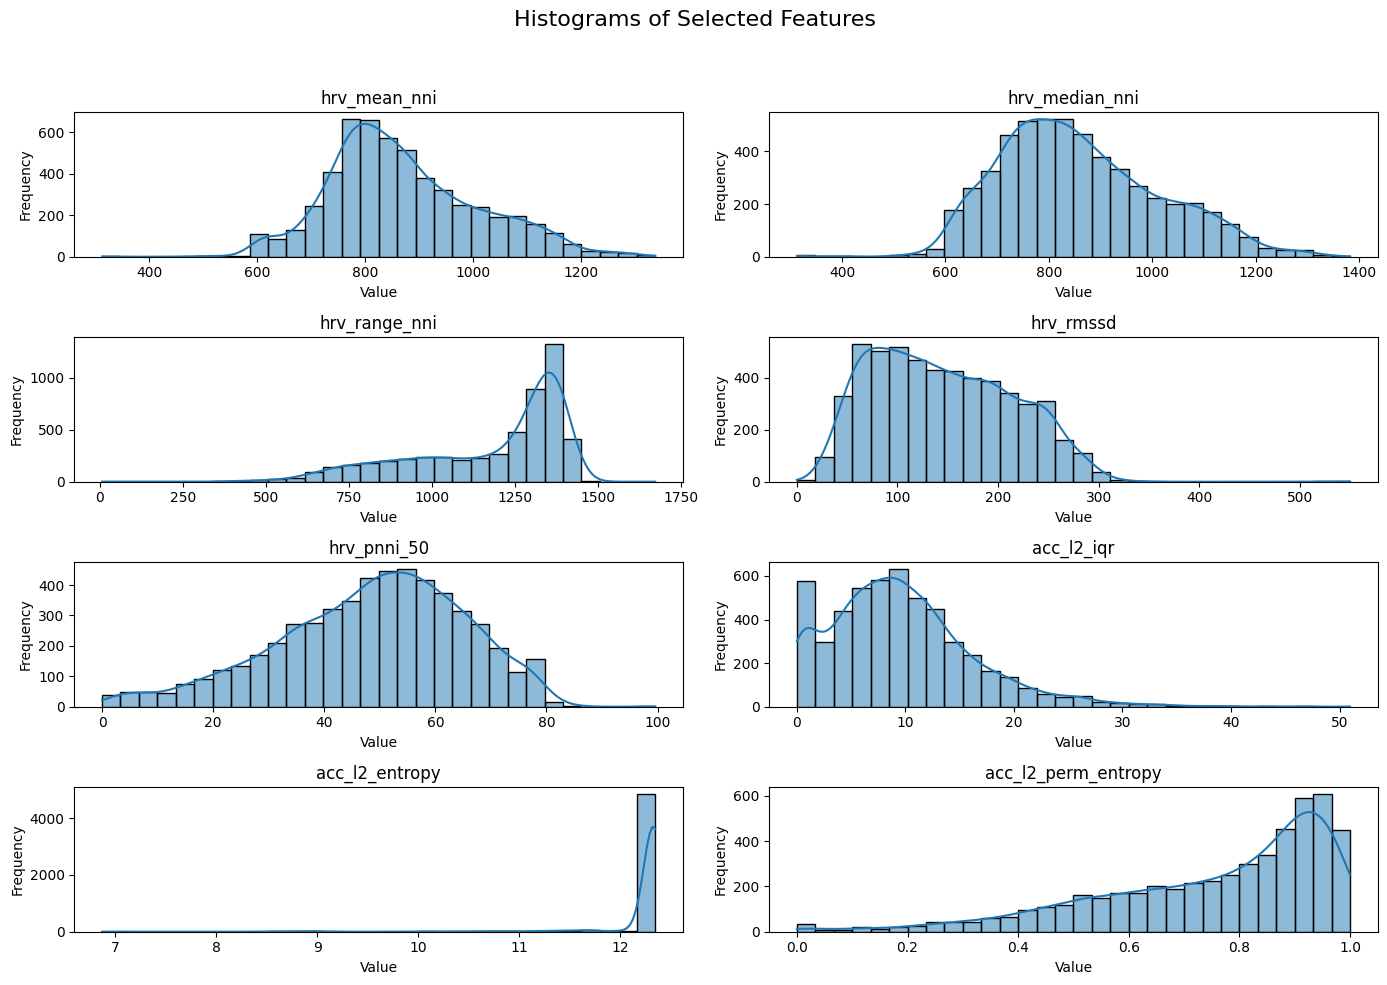

In [8]:
# Define the selected features
selected_features = [
    'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni', 'hrv_rmssd',
    'hrv_pnni_50', 'acc_l2_iqr', 'acc_l2_entropy', 'acc_l2_perm_entropy'
]

# Ensure selected features are in the combined data
filtered_data = combined_data[selected_features].copy()

import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of rows and columns for the subplot grid
num_features = len(selected_features)
num_cols = 2
num_rows = (num_features + 1) // num_cols  # Calculate rows needed for the grid

# Set up the figure size and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 10))
fig.suptitle("Histograms of Selected Features", fontsize=16)

# Plot each histogram in a subplot
for i, feature in enumerate(selected_features):
    row, col = divmod(i, num_cols)
    sns.histplot(filtered_data[feature].dropna(), kde=True, bins=30, ax=axes[row, col])
    axes[row, col].set_title(f'{feature}')
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')

# Remove empty subplots, if any
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()


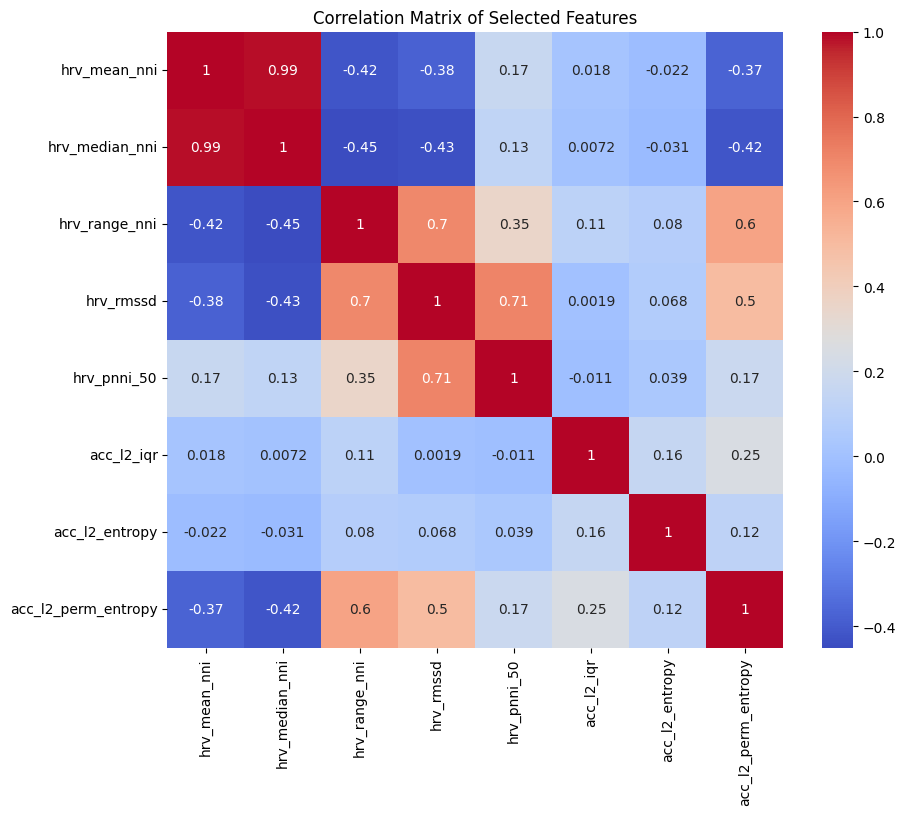

In [9]:
# Correlation matrix visualization for selected features
plt.figure(figsize=(10, 8))
corr_matrix = filtered_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Selected Features")
plt.show()

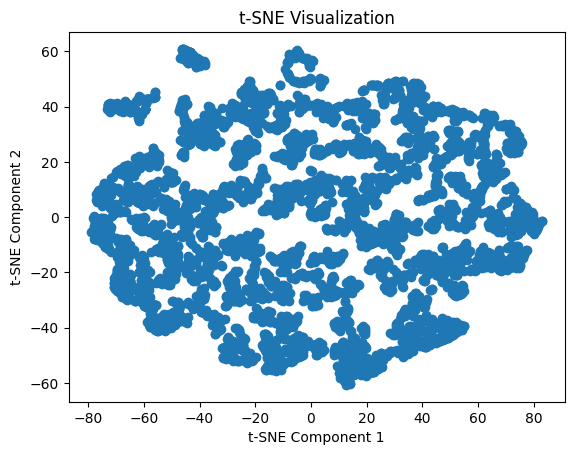

In [10]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)  # Use 2 components for visualization
tsne_result = tsne.fit_transform(imputed_data)

plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title("t-SNE Visualization")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


In [12]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=4, random_state=0)
ica_result = ica.fit_transform(imputed_data)
print("Reduced number of features after ICA:", ica_result.shape[1], ica_result)


Reduced number of features after ICA: 4 [[ 0.02299061  0.16657313 -0.46313994 -0.66722324]
 [-0.5032482  -0.31111788 -0.56210633 -0.6466693 ]
 [-0.54472349 -0.13915044 -0.47570906 -0.66659798]
 ...
 [-0.83328568  0.87844887 -0.37122703 -0.2399475 ]
 [-0.33523989  0.87339879 -0.22934211 -0.41070258]
 [-0.34086557  0.86225956 -0.09310341 -0.43297311]]


In [11]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
rfe = RFE(estimator=model, n_features_to_select=10)  # Select top 10 features
rfe_result = rfe.fit(imputed_data, target)  # 'target' should be your labels if available

selected_features = combined_data.columns[rfe.support_]
print("Top selected features via RFE:", selected_features)


NameError: name 'target' is not defined

In [12]:
importances = model.feature_importances_  # After fitting a tree-based model
feature_importance = pd.Series(importances, index=combined_data.columns)
top_features = feature_importance.nlargest(10)  # Select top 10 important features

print("Top features via Random Forest importance:\n", top_features)


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [13]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)  # Adjust alpha to control sparsity
lasso.fit(imputed_data, target)  # 'target' should be your labels if available

lasso_features = combined_data.columns[lasso.coef_ != 0]
print("Selected features via Lasso:", lasso_features)


NameError: name 'target' is not defined

In [13]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

input_dim = imputed_data.shape[1]
encoding_dim = 10  # Adjust based on desired dimensionality

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(imputed_data, imputed_data, epochs=50, batch_size=32, shuffle=True)

# Extract the encoder part for dimensionality reduction
encoder = Model(input_layer, encoded)
encoded_data = encoder.predict(imputed_data)
print("Reduced data shape via autoencoder:", encoded_data.shape)


2024-11-24 10:32:57.221752: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-24 10:32:57.333937: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-24 10:32:58.192048: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-11-24 10:

Epoch 1/50
169/169 [==============================] - 0s 745us/step - loss: 38233751624351744.0000
Epoch 2/50
169/169 [==============================] - 0s 656us/step - loss: 38233747329384448.0000
Epoch 3/50
169/169 [==============================] - 0s 641us/step - loss: 38233751624351744.0000
Epoch 4/50
169/169 [==============================] - 0s 623us/step - loss: 38233743034417152.0000
Epoch 5/50
169/169 [==============================] - 0s 626us/step - loss: 38233730149515264.0000
Epoch 6/50
169/169 [==============================] - 0s 626us/step - loss: 38233743034417152.0000
Epoch 7/50
169/169 [==============================] - 0s 669us/step - loss: 38233730149515264.0000
Epoch 8/50
169/169 [==============================] - 0s 630us/step - loss: 38233755919319040.0000
Epoch 9/50
169/169 [==============================] - 0s 633us/step - loss: 38233734444482560.0000
Epoch 10/50
169/169 [==============================] - 0s 626us/step - loss: 38233747329384448.0000
Epoch 11/